# Model Evaluation and Refinement - Used Car Pricing

Objectives - Evaluate and refine prediction models

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
used_cars_clean_data = 'clean_df.csv'

In [4]:
df = pd.read_csv(used_cars_clean_data)
df.head()

,Unnamed: 0,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas,std,turbo
0,0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,13495.0,11.190476,Low,False,True,True,False
1,1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,...,5000.0,21,8.703704,16500.0,11.190476,Low,False,True,True,False
2,2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,...,5000.0,19,9.038462,16500.0,12.368421,Medium,False,True,True,False
3,3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,...,5500.0,24,7.833333,13950.0,9.791667,Low,False,True,True,False
4,4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,...,5500.0,18,10.681818,17450.0,13.055556,Low,False,True,True,False


In [5]:
df['highway-mpg'] = 235/df['highway-L/100km']
df.to_csv('used_car_pricing_cleaned_df.csv')

In [6]:
#first let's use only numeric data
df = df._get_numeric_data()
df.head()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,diesel,gas,std,turbo,highway-mpg
0,0,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,...,5000.0,21,8.703704,13495.0,11.190476,False,True,True,False,27.0
1,1,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,...,5000.0,21,8.703704,16500.0,11.190476,False,True,True,False,27.0
2,2,1,122,94.5,0.822681,0.909722,0.876254,2823,152,2.68,...,5000.0,19,9.038462,16500.0,12.368421,False,True,True,False,26.0
3,3,2,164,99.8,0.848630,0.919444,0.908027,2337,109,3.19,...,5500.0,24,7.833333,13950.0,9.791667,False,True,True,False,30.0
4,4,2,164,99.4,0.848630,0.922222,0.908027,2824,136,3.19,...,5500.0,18,10.681818,17450.0,13.055556,False,True,True,False,22.0


In [8]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,diesel,gas,std,turbo,highway-mpg
0,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,...,5000.0,21,8.703704,13495.0,11.190476,False,True,True,False,27.0
1,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,...,5000.0,21,8.703704,16500.0,11.190476,False,True,True,False,27.0
2,1,122,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,...,5000.0,19,9.038462,16500.0,12.368421,False,True,True,False,26.0
3,2,164,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,...,5500.0,24,7.833333,13950.0,9.791667,False,True,True,False,30.0
4,2,164,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,...,5500.0,18,10.681818,17450.0,13.055556,False,True,True,False,22.0


Installing and importing "ipywidgets", this is a python library used for creating interactive widgets in Jupyter notebook.
     1. 'micropip' is used for installing packages in Pyodide (browser-based python environments)
     2. "ipywidgets" enables interactive UI elements in Jutyper Notebooks.
     3. "interact", "interactive", "fixed", and "interact_manual" help create sliders, text boxes, and buttons for user interaction

This is useful for data visusalization, interactive ML models, and dashboards!

In [9]:
%pip install micropip
import micropip
await micropip.install(['ipywidgets'], keep_going = True)
import ipywidgets
from ipywidgets import interact, interactive, fixed, interact_manual

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



#### Functions for plotting 

Using "DistributionpLOT" function to Visualize the distribution of two datasets using "Kernel Density Estimation (KDE)" plots from the seaborn library. This is commonly used to compare the distributions of numerical data.

In [50]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Ttile):
    width = 12
    height = 10
    plt.figure(figsize = (width,height))
    ax1 = sns.kdeplot(RedFunction, color = 'r', label = RedName)
    ax2 = sns.kdeplot(BlueFunction, color = 'b', label = BlueName, ax = ax1)
    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

PlloyPlot Function - The 'PlloyPlot Function' is designed to visualize polynomial regression by plotting
1. Training data (Red points in our example)
2. Test Data (Blue points inour example)
3. Predicted Polynomial Regression Curve

It helps asses how well the polynomial regression model fits the training and tst data.

Key Takeaways
1. Polynomial Regression Visualization using 'seaborn' and 'matplotlib'
2. Compares training and test datawith the predicted polynomial curve
3. Uses 'PolynomialFeautuers' to transform data and 'LinearRegression' to fit the model.
4. Great for analysing overfitting/underfitting

In [67]:
def PollyPlot (xtrain, xtest, y_train, y_test, lr, poly_transform):   #defines function with 6 input parameters
    width = 12
    height = 10
    plt.figure(figsize = (width, height))   # sets figure size to 21x10 inches for better visualization
    xmax = max([xtrain.values.max(), xtest.values.min()])   #finds minimum(xmin) and maximum(xmax) values in xtrain and xtest to determine the range for plotting
    xmin = min([xtrain.values.min(), xtest.values.min()])
    x = np.arange(xmin, xmax, 0.1)   #creates a range of x-values (x) from (xmin) to (xmax) with a step size of 0.1, this ensures a smooth curve when plotting the polymonial function
    plt.plot(xtrain, y_train, 'ro', label = 'Training Data')  #plots training data as red dots (ro)
    plt.plot(xtest, y_test, 'go', label = 'Test Data')   #plots training data as green dots (go), and labels data for legend
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1,1))), label = 'Prediocted Function')   #applies Polynomial Transformation on 'x' using 'poly_transform.fit_transform(x.reshape(-1,1)), and uses trained lr to predict the output values
    plt.ylim([-10000, 60000])  #sets y-axis range from -10000 tp 60000
    plt.ylabel('Price')
    plt.legend()

## 1. Training and Testing

An important step in testing our model is to split our data into training and testing data. We will place the target data 'price' in a separate dataframe y_data.

In [40]:
y_data = df['price']

In [14]:
#drop price data in the data feame x_data
x_data = df.drop('price', axis = 1)

In [18]:
#now we randomly split our data into training and testing data using the function "train_test_split"
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.10, random_state = 1)

print('Number of test samples: ', x_test.shape[0])
print('Number of training sample: ', x_train.shape[0])

#CODE EXPLANATION
# Line 4 - x_data = feature variable(input data), y_data = target variable(output data), test_size = 0.10 => 10% of the data is used for testing, and the remaining 90% for training, random_state = 1 ==> ensure reproducibility(same splitevery time)
#lin 6&7 = x_test.shape [0] --> no.of test samples, similarlly x_train.shape[0] --> no.of training samples

Number of test samples:  21
Number of training sample:  180


In [19]:
print('Total dataset size: ', x_data.shape[0])

Total dataset size:  201


Question 1 - Use the function'train_test_split' to split up the dataset such that 40% of the data samples will be utilized for testing. Set the parameter 'random_state' equals to 0. The output of the function should be the following: 'x_train1', x_test1', 'y_train1', y_test1'

In [22]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size = 0.4, random_state = 0)

print ('No.of test samples 1 : ', x_test1.shape[0])
print('No.of training samples 1 : ', x_train1.shape[0])

No.of test samples 1 :  81
No.of training samples 1 :  120


In [24]:
#let's import LinearRegression from the module linear_model
from sklearn.linear_model import LinearRegression

#let's create linear regression object
lre = LinearRegression()

#let's fit the model using the feature 'horsepower'
lre.fit(x_train[['horsepower']], y_train)

#calcualte r^2 on the test data 
lre.score(x_test[['horsepower']], y_test)

0.3635480624962413

In [25]:
#R^2 for training data
lre.score(x_train[['horsepower']], y_train)

0.662028747521533

We can see that the R62 value of test data is smaller compared to the training data

Question 2 - Find R^2 on the data using 40% of the dataset for testing

In [27]:
lre.fit(x_train1[['horsepower']], y_train1)
lre.score(x_test1[['horsepower']], y_test1)

0.7139737368233015

In [28]:
lre.score(x_train1[['horsepower']], y_train1)

0.5754853866574969

Here we can see that the R62 value of test data is large compared to training data

Sometimes we do not have sufficient data, as a result, we may want to perform cross-validation. Let's go over several methods that we can use for cross-validation.

### Cross Validation Score

In [29]:
#let's import 'cross_val_score' from module 'model_selection'
from sklearn.model_selection import cross_val_score

We input the object, the featurew (horsepower), and the target data (y_data). The parameter 'cv' determines the number of folds. In this case it's 4

In [30]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv =4)
#the default scoring is R^2. Each element in the array has the average R^2 value for the fold
Rcross

array([0.77465419, 0.51718424, 0.74814454, 0.04825398])

In [32]:
#we can calculate the average and standard deviation of our estimate
print('The mean of the fold are: ', Rcross.mean(), 'and the standard deviation is: ', Rcross.std())

The mean of the fold are:  0.5220592359225414 and the standard deviation is:  0.29130480666118436


In [33]:
#we can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'
-1*cross_val_score(lre, x_data[['horsepower']], y_data, cv= 4, scoring ='neg_mean_squared_error')

array([20251357.7835463 , 43743920.05390439, 12525158.34507633,
       17564549.69976653])

When you execute this code, the cross_val_score function follows these steps behind the scenes:

1. Split the dataset into cv=4 folds.
2. Train the model 4 times, using 3 folds for training and 1 fold for testing each time.
3. Calculate the performance metric (R² or MSE) for each fold.
4. Store the results in an array and compute the mean and standard deviation.
5. Return the results, giving insight into model accuracy and stability.

Why Is This Important?
Reduces overfitting → Ensures the model is not biased toward one particular dataset split.
Gives a more robust estimate of model performance.
Standard deviation tells us how stable the model is.

Our dataset size is 201 and use 4-fold cross-validation (cv=4), it cannot be perfectly divided into equal parts because 201 is not divisible by 4.

How Will Scikit-Learn Handle It?
Scikit-Learn will distribute the data as evenly as possible across the 4 folds:

First 3 folds will get 50 samples each.
Last fold will get 51 samples (one extra).

Three folds have 50 test samples each, but the last fold has 51 test samples.
The training size is mostly 151, except in the last fold where it's 150.
Scikit-Learn automatically handles this imbalance without errors.

Question 3 - Clculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the 'horsepower' feature

In [34]:
Rc = cross_val_score(lre, x_data[['horsepower']], y_data, cv = 2)
Rc.mean()

0.516835099979672

We can also use the function 'cross-val_predict' to predict the output. The function splits up the data into the specified number of folds, with one fold for testing nad the other folds are used for training. Let's first import the function

In [37]:
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv = 4)
yhat[0:5]

array([14142.23793549, 14142.23793549, 20815.3029844 , 12745.549902  ,
       14762.9881726 ])

## 2. Overfitting, Underfitting and Model Selection

It turns out that the test data, sometimes referred to as 'out of sample data', is a much better measure of how well our model performs in the real world. One reason for this is overfitting.

Let's go over some examples. It turns out these differnces are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.

Let's create multiple linear regression objects and train the model using 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg' as features.

In [42]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [43]:
#prediction using training data
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train [0:5]

array([ 7426.34910902, 28324.42490838, 14212.74872339,  4052.80810192,
       34499.8541269 ])

In [44]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.68099115,  5884.25292475, 11208.31007475,  6641.03017109,
       15565.98722248])

Let's perform some model evaluation using our training and testing data seperately. First, we import the seaborn and matplotlib library for plotting

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<Figure size 1200x1000 with 0 Axes>

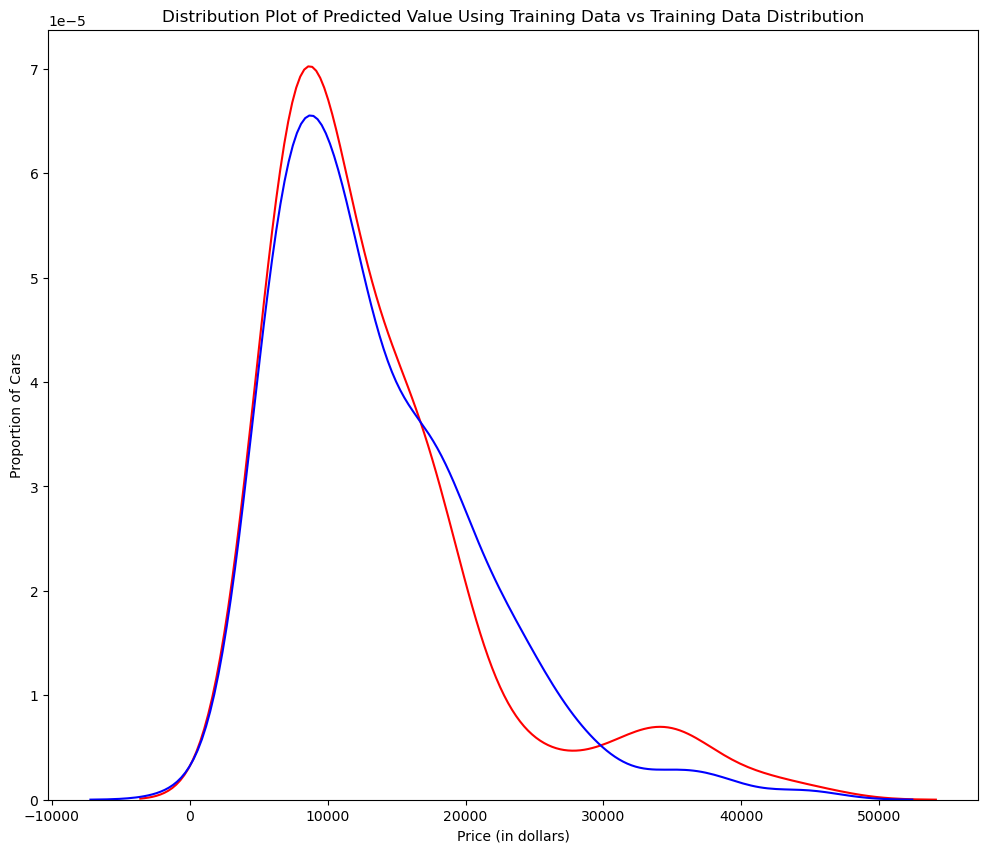

In [51]:
#let's examine the distribution of the predicted values of the training data
Title = 'Distribution Plot of Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actiual Values (Train)", "Predicted Values (Train)", Title)

Figure 1 - plot of predicted values using the training data compared to the actual values of the training data.

So far, the model seems to be doing well in learning from the training dataset. But what happens when the modell encounters new data from testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.

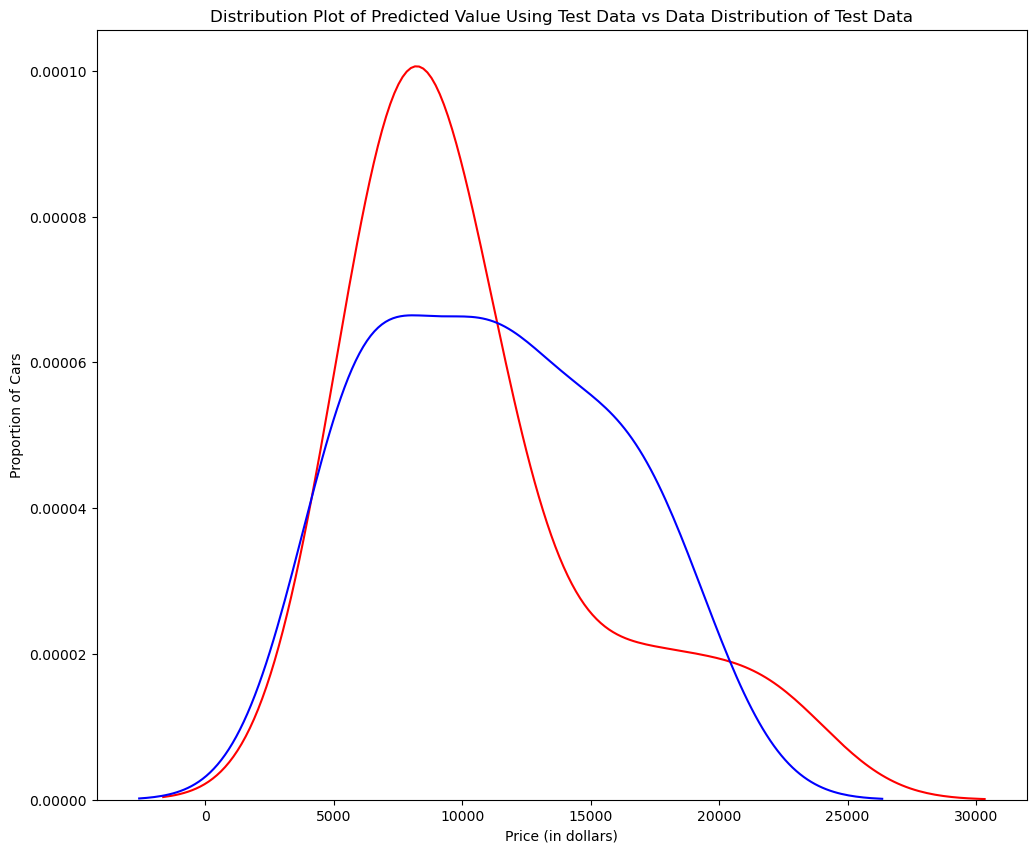

In [53]:
Title = 'Distribution Plot of Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test, 'Actual Values(Test)', 'Predicted Values (Test)', Title)

Figure 2 - Plot of predicted value using the test data compared to the actual values of the test data.

Comparing fig 1 and fig 2, it is evidebt that the distribution of the test data in fig 1 is much better at fitting the data. This difference in fig 2 is apparent in the range of 5000 to 150000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

In [54]:
from sklearn.preprocessing import PolynomialFeatures

#### Overfitting

Overfitting occurs when the model fits the noise, but not the underlying process. Therefore when testing our model using the test set, our model doesn't perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial mode.

In [56]:
#let's use 55% of the data for training and the rest for testing
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.45, random_state = 0)

In [57]:
# let's performe a degree 5 polynomial transformation on the feature 'horsepower'
pr = PolynomialFeatures(degree = 5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [58]:
#let's create a linear regression model'poly' and train it.
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [59]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6727.55829006,  7306.68835592, 12213.70528936, 18895.05647465,
       19996.86213884])

In [60]:
#let's take the first five predicted values and compare it to the actual targets
print('Predicted Values: ', yhat[0:4])
print('Actual Values: ', y_data[0:4].values)

Predicted Values:  [ 6727.55829006  7306.68835592 12213.70528936 18895.05647465]
Actual Values:  [13495. 16500. 16500. 13950.]


Let's use the function'PollyPlot' that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.

In [69]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, pr, poly)


AttributeError: 'PolynomialFeatures' object has no attribute 'predict'

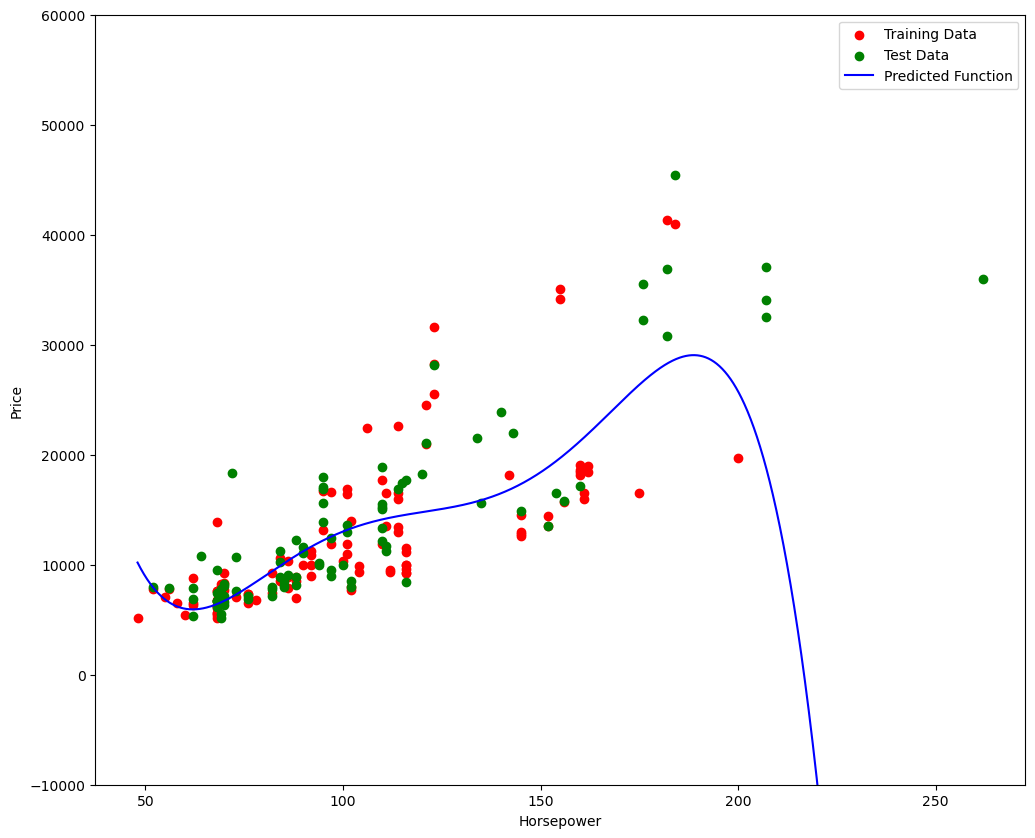

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Define polynomial transformer
poly = PolynomialFeatures(degree=5)  # Adjust degree as needed

# Transform training and test data
x_train_poly = poly.fit_transform(x_train[['horsepower']])
x_test_poly = poly.transform(x_test[['horsepower']])

# Train the model
pr = LinearRegression()
pr.fit(x_train_poly, y_train)

# Function to plot polynomial regression
def PollyPlot(xtrain, xtest, y_train, y_test, lr, poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    # Find range for plotting
    xmax = max([xtrain.max(), xtest.max()])
    xmin = min([xtrain.min(), xtest.min()])

    # Generate smooth x values for plotting
    x_range = np.arange(xmin, xmax, 0.1).reshape(-1, 1)

    # Transform x values using the trained polynomial transformer
    x_range_poly = poly_transform.transform(x_range)

    # Predict using the trained regression model
    y_pred = lr.predict(x_range_poly)

    # Plot training and test data points
    plt.scatter(xtrain, y_train, color='red', label='Training Data')
    plt.scatter(xtest, y_test, color='green', label='Test Data')

    # Plot predicted function
    plt.plot(x_range, y_pred, color='blue', label='Predicted Function')

    # Formatting
    plt.ylim([-10000, 60000])
    plt.xlabel('Horsepower')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

# Call the function to generate the plot
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, pr, poly)

Figure 3 - A ploynomial regression model where red dots reprseents the training data, ghreen dots represent test data, and the blue line represent the model prediction.

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.

In [74]:
#R^2 of the training data
pr.score(x_train_pr, y_train)

0.5568527854126715

In [75]:
#R^2 of the test data
pr.score(x_test_pr, y_test)

-29.815420705122747

We see that r^2 for the training data is 0.5568 while the R^2 for the test data is -29.8154. The lower the R^2, the worst the model. A negative R^2 is a sign of overfitting.

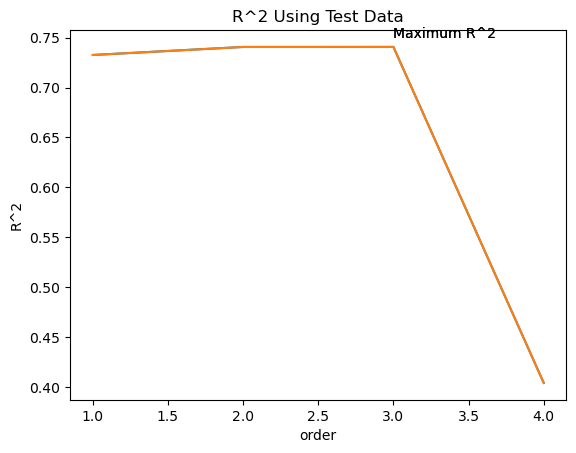

In [81]:
#let's see how the value of R^2 changes on the test data for different order polynomials and then plot the results
Rsqu_test = []

order = [1,2,3,4]
for n in order:
    pr = PolynomialFeatures(degree = n)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    lr.fit(x_train_pr, y_train)
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2')
plt.show()

We see the R^2 gradually increases untill an order three polynomial is used. then, the R^2 dramatically decreases at an order four polynomial

In [85]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = test_data, random_state = 0)
    pr = PolynomialFeatures(degree = order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x-train_pr, y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly, pr)

In [86]:
#the following interface allows us to experiment with different polynomial orders and different amounts of data
interact(f, order = (0,6,1), test_data = (0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

Question 4a - We can perform polynomial transformations with more than one feature. Create a 'PolynomialFeatures' object 'pr1' of degree 2. 

In [87]:
pr1 = PolynomialFeatures(degree = 2)

In [88]:
#4B - Transforming the training and testing samples for the features 'horespower', 'curb-weight', 'engine-size' and 'highway-mpg'.
x_train_pr1 = pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1 = pr1.fit_transform(x_test[['horsepower','curb-weight', 'engine-size', 'highway-mpg']])

In [90]:
#4c - How many dimensions does the new feature have
x_train_pr1.shape

(110, 15)

In [91]:
#4d - Create a linear regression  model 'poly1'. Train the object using the method 'fit' using the polynomial features.
poly1 = LinearRegression().fit(x_train_pr1, y_train)

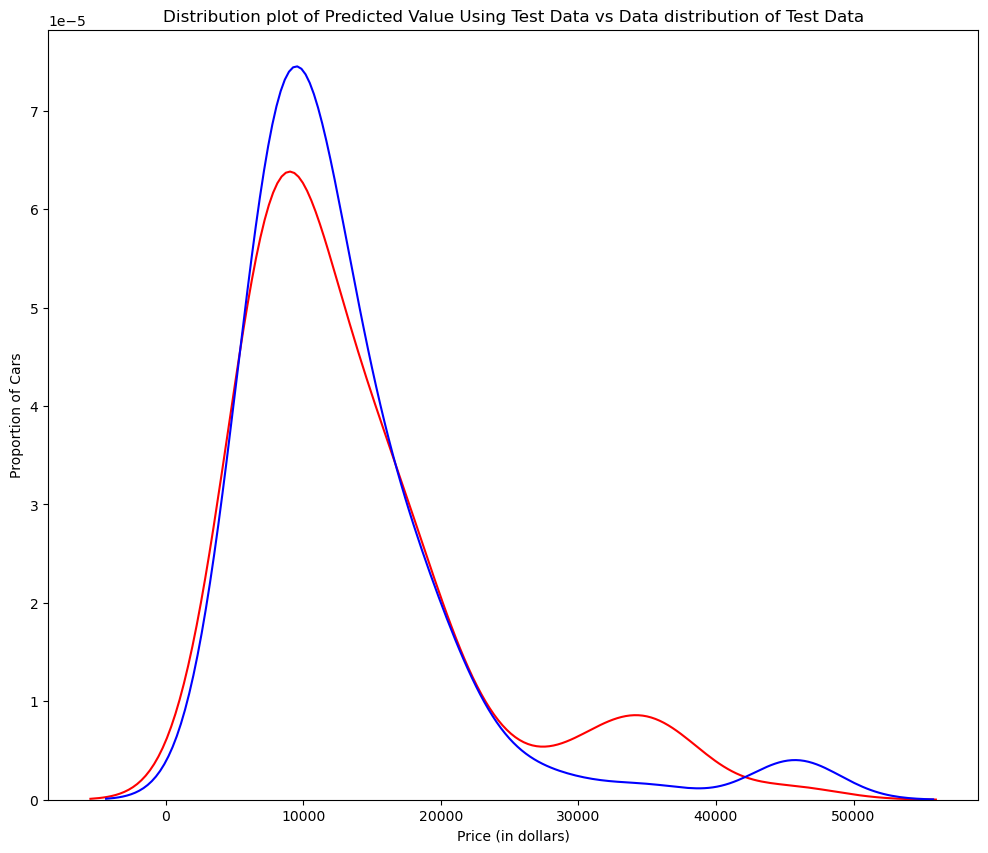

In [92]:
#4e - Use the method 'predict' to predict anoutput on the polynomial features, then use the function 'DistributionPlot' to display the distribution of the predicted test output vs the actual test data.
yhat_test1 = poly1.predict(x_test_pr1)
Title = 'Distribution plot of Predicted Value Using Test Data vs Data distribution of Test Data'
DistributionPlot(y_test, yhat_test1, 'Actual Values (Test)', 'Predicted Values (Test)', Title)

The predicted value is higher than the actual value for the cars where the price $10,00 range conversely the predicted price is lower than the price cost in the $30,000 to $40,000 range. As such the model is not as accurate in these ranges.

## 3. Ridge Regression

In this section, we will review ridge regression and see how the parameter 'alpha' changes the model. , note - here our test data will be used as validation data.

Let's perform a 2 dgree polynomial transformation on our data

In [97]:
pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])
x_test_pr = pr.fit_transform (x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])

In [98]:
#let's import ridge fom module 'linear models'
from sklearn.linear_model import Ridge

#let's create a ridge regression object, setting the regularization parameter (alpha) to 0.1
RigeModel = Ridge(alpha = 1)

#like regular regression, we can fit the model using the methof 'fit'
RigeModel .fit(x_train_pr, y_train)

Ridge(alpha=1)

In [100]:
#similarly we can obtain a prediction
yhat = RigeModel.predict(x_test_pr)

In [101]:
#let's compare the first 5 predicted samples to our test set
print('Predicted: ', yhat[0:4])
print('Test set: ', y_test[0:4].values)

Predicted:  [ 6572.19586866  9634.40697747 20948.17104272 19403.38016094]
Test set:  [ 6295. 10698. 13860. 13499.]


We aselect the value of alpha that minimizes the error. To do so we can use a for loop, we have alos created a progress bar to see how may iterations we have completed so far

In [104]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10*np.array(range(1,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha = alpha)
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    pbar.set_postfix({'Test Score': test_score, 'Train Score': train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 999/999 [00:09<00:00, 101.31it/s, Test Score=0.564, Train Score=0.859]


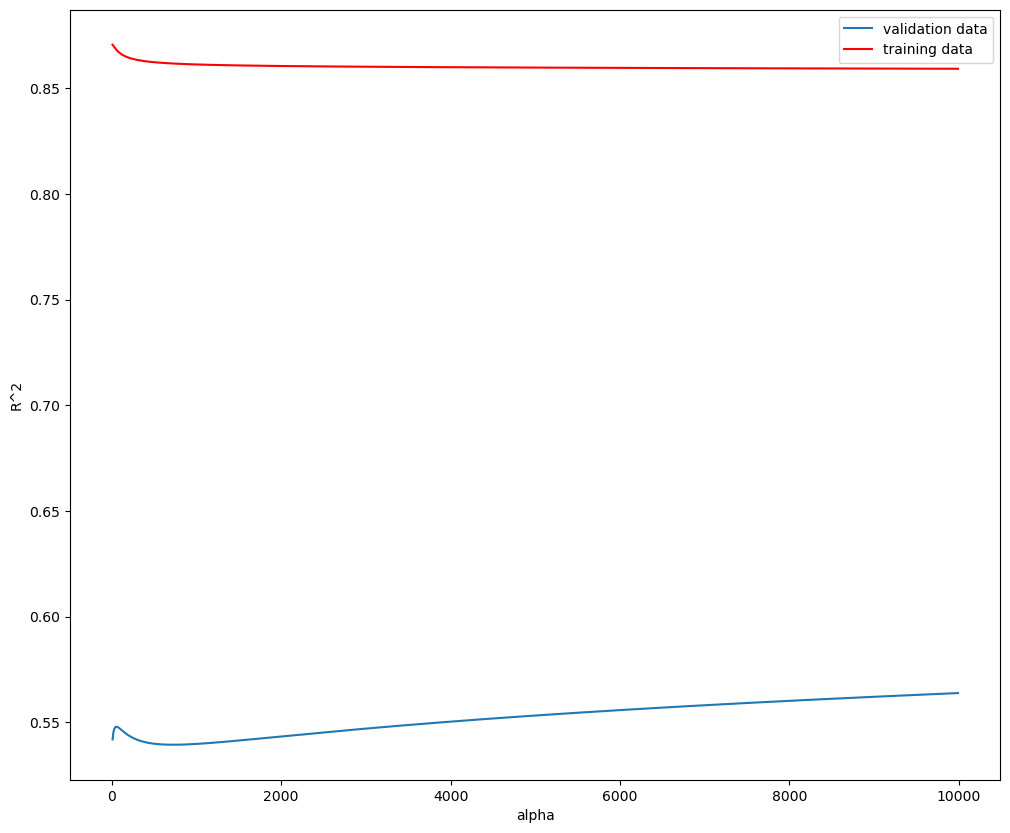

In [105]:
#we can plot out the value of R^2 for different alphas
width = 12
height = 10
plt.figure(figsize = (width, height))

plt.plot(Alpha, Rsqu_test, label = 'validation data')
plt.plot(Alpha, Rsqu_train, 'r', label = 'training data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()
plt.show()

Figure 4 - The blue line represents the R^2 of the validation data, and the red line representsthe R^2 of the trainning data. The x-axis represent different values of alpha.

Here the model is built and tested on the same data, so the training and test data are the same.

The red line represents the R^2 of the training data, as the aplha increase R^2 decreases. Therfore, as the aplha value increases the model performs worse on the training data. The blue line represents the R^&2 on the validation data, as the aipha value increases the R^2 increases and converge at a point.

Question 5 - Performe ridge regression, calculate thr R62 using the polynomial features, use the training data to trainthe model and use the test data to test the model. the parameter alpha should set to 10

In [107]:
RigeModel = Ridge(alpha = 10)
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.54183335186757

## 4. Grid Search

The term alpha is a hyperparameter. Sklearn has the class 'GridSearchCV' to make the process of finding the best hyperparameter simpler.

Let's import 'GridSearchCV' from the module 'model_selection'.

In [112]:
from sklearn.model_selection import GridSearchCV

#let's create a dictionary of parameter values
parameters1 = [{'alpha': [0.001, 0.1,1,10,1000,10000,100000,1000000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 1000, 10000, 100000, 1000000]}]

In [113]:
#create ridge regression object
RR = Ridge()
RR

Ridge()

In [114]:
#CREATE A RIDGE GRID SEARCH OBJECT
Grid1 = GridSearchCV (RR, parameters1, cv = 4)

In [115]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 1000, 10000, 100000,
                                    1000000]}])

The object finds the best parameter values on the validation data. we can obtain the estimator with the best parameters and assign it top the variable BestRR

In [116]:
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [117]:
#let's test our model on test data
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411781387793231

Question 6 - Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of parameters

In [121]:
parameters2 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000]}]

Grid2 = GridSearchCV(Ridge(), parameters2, cv = 4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)
best_alpha = Grid2.best_params_['alpha']
best_ridge_model = Ridge(alpha = best_alpha)
best_ridge_model.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

Ridge(alpha=10000)